<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 4</h3> </center>
<center> <h5>4. November 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>11.11.2022, 10:00 Uhr, via eCampus</b></h5> </center>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren. 

### Aufgabe 1  (Kantenerkennung und Abtasttheorem, 10 Punkte)

Für die Kantenerkennung in Bildern benötigen wir die Norm der Bildgradienten, welche bis jetzt auf den ursprünglichen Pixelgittern berechnet wurde. In dieser Aufgabe überlegt Ihr Euch, warum dies laut Abtast-Theorem nicht korrekt ist. Anschließend leitet Ihr einen Trick her, mit dem man Kanten feiner Strukturen genauer darstellen kann.  
a) Auf dem vorheringen Blatt habt Ihr gesehen, wie sich Ortsableitungen im Frequenzraum auswirken: Hohe Frequenzanteile werden dabei verstärkt, die Bandbegrenzung des Signals bleibt jedoch erhalten. Bei der Berechnung der (quadrierten) Norm multiplizieren wir die Ableitungen (Koeffizienten des Gradienten) zudem mit sich selbst. Welche Auswirkungen hat das im Frequenzraum? Hat die Gradientennorm eine höhere Bandbreite als das ursprüngliche Bild? Überlegt Euch, wie die Norm des Gradienten abgetastet werden muss, um die Nyquist-Bedingung zu erfüllen. Wie dicht sollte demnach das Pixelgitter sein, um die Gradientennorm korrekt darzustellen? (5P)  
_Tipp: Denkt daran, dass sich der Faltungssatz auch auf den Fall anwenden lässt, in dem eine Multiplikation im Ortsraum stattfindet._

_Lösung:_  
</br>



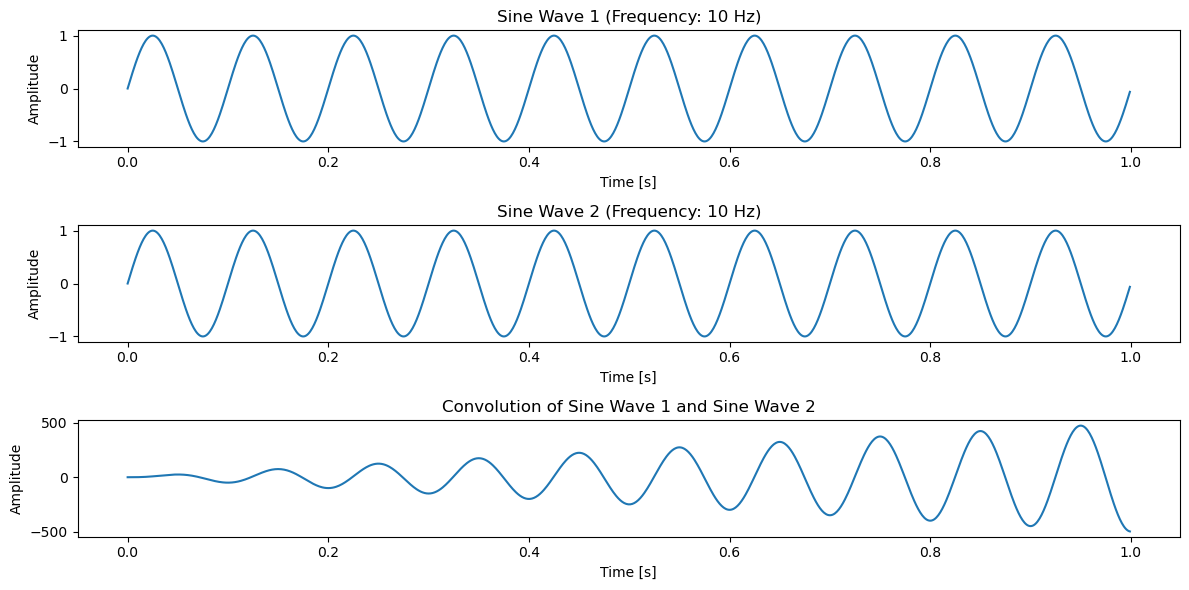

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for sine waves
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time axis, 1 second duration

# Define two sine waves with different frequencies
freq1 = 10  # Frequency of first sine wave (5 Hz)
freq2 =  # Frequency of second sine wave (10 Hz)

sine_wave1 = np.sin(2 * np.pi * freq1 * t)
sine_wave2 = np.sin(2 * np.pi * freq2 * t)

# Convolve the two sine waves
convolved_wave = np.convolve(sine_wave1, sine_wave2, mode='same')

# Visualization
plt.figure(figsize=(12, 6))

# Plot the first sine wave
plt.subplot(3, 1, 1)
plt.plot(t, sine_wave1)
plt.title(f"Sine Wave 1 (Frequency: {freq1} Hz)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot the second sine wave
plt.subplot(3, 1, 2)
plt.plot(t, sine_wave2)
plt.title(f"Sine Wave 2 (Frequency: {freq2} Hz)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot the convolved result
plt.subplot(3, 1, 3)
plt.plot(t, convolved_wave[:fs])  # Truncate to match the time axis length
plt.title("Convolution of Sine Wave 1 and Sine Wave 2")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


b) Wendet die Canny-Kantenerkennung auf das Bild ```MBA_down.png``` an. Da das Bild rauschfrei ist, benötigen wir keine Vorglättung. Interpoliert anschließend das ursprüngliche Bild auf die doppelte Auflösung und wendet die gleiche Canny-Kantenerkennung erneut an. Visualisiert die Ergebnisse und beschreibt Euren Befund. Passt er zu Euren Überlegungen aus Teil a)? (5P)

In [4]:
import numpy as np
import skimage as ski
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

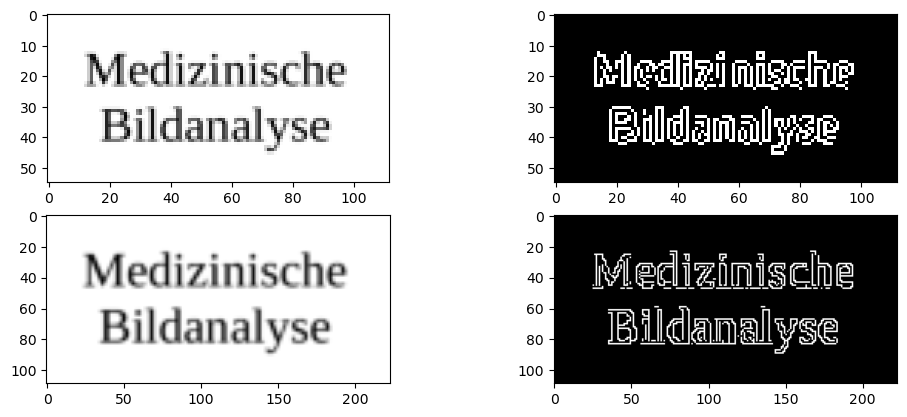

In [2]:
# Lösung
img = ski.io.imread("MBA_down.png")
img_canny = ski.feature.canny(img, sigma=0)

def upscale(img):
	# Bild mit doppelter Größe erzeugen
	upscaled_img = np.zeros((img.shape[0]*2-1, img.shape[1]*2-1))

	# ursprüngliche Pixel behalten
	upscaled_img[::2, ::2] = img
	
	# Interpolation
	upscaled_img[1::2, ::2] = (upscaled_img[:-1:2, ::2] + upscaled_img[2::2, ::2]) * 0.5
	upscaled_img[::2, 1::2] = (upscaled_img[::2, :-1:2] + upscaled_img[::2, 2::2]) * 0.5
	upscaled_img[1::2, 1::2] = (upscaled_img[:-1:2, 1::2] + upscaled_img[2::2, 1::2]) * 0.5

	return upscaled_img

img_upscaled = upscale(img)
#img_upscaled = ski.transform.rescale(img, scale=2)
img_upscaled_canny = ski.feature.canny(img_upscaled, sigma=0)

fig, axes = plt.subplots(2, 2)

fig.set_figwidth(12)

axes[0, 0].imshow(img, cmap="gray")

axes[0, 1].imshow(img_canny, cmap="gray")

axes[1, 0].imshow(img_upscaled, cmap="gray")

axes[1, 1].imshow(img_upscaled_canny, cmap="gray")

plt.show()

### Aufgabe 2  (Nullen im Frequenzraum, 10 Punkte)

Auf dem vorherigen Blatt habt Ihr gesehen, dass ein Auffüllen mit Nullen im Frequenzraum (zero padding) einem Upsampling des Bildes entspricht. Diesmal finden wir heraus was passiert, wenn man statt dessen Teile des Frequenzraums durch Nullen ersetzt.  
a) Wendet die FFT auf das Bild ```SheppLogan.png``` an. Behaltet diesmal jede k-te Spalte im Frequenzraum bei und setzt alle anderen Werte auf Null. Achtet dabei darauf, immer die Nullfrequenz sowie zusammengehörige positive und negative Frequenzen zu behalten. Schaut Euch die rücktransformierten Bilder für verschiedene Werte von k an. (5P)

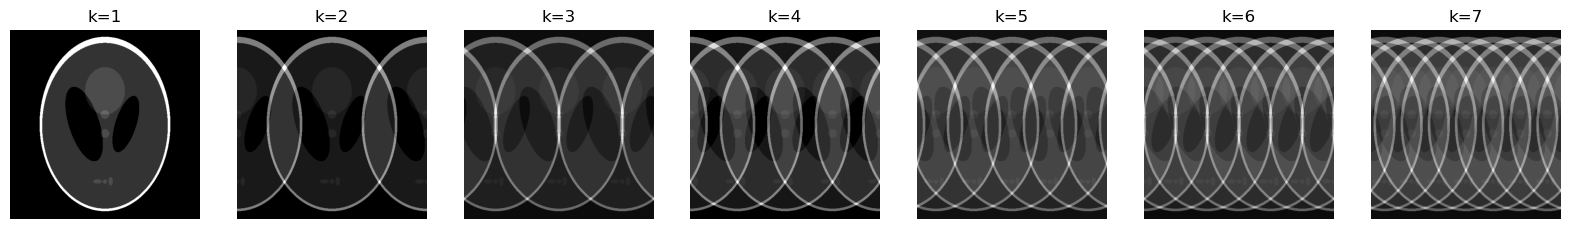

In [ ]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as ski_io

img_shepp = ski_io.imread("SheppLogan.png")
fft_shepp = fft2(img_shepp)
fft_shepp = fftshift(fft_shepp)

n = 7
fig, axes = plt.subplots(1, n)
fig.set_figwidth(20)

for i in range(n):
    k = i + 1
    fft_shepp_k = np.zeros_like(fft_shepp, dtype=complex)

    for j in range(-fft_shepp.shape[1] // (2 * k), fft_shepp.shape[1] // (2 * k) + 1):
        idx = j * k + fft_shepp.shape[1] // 2
        if 0 <= idx < fft_shepp.shape[1]:
            fft_shepp_k[:, idx] = fft_shepp[:, idx]

    img_shepp_after = np.real(ifft2(ifftshift(fft_shepp_k)))

    axes[i].imshow(img_shepp_after, cmap="gray")
    axes[i].set_title(f"k={k}")
    axes[i].axis("off")

plt.show()


b) Erklärt Eure Beobachtungen aus Teil a). Seht Ihr einen Zusammenhang zum Aliasing-Effekt? (5P)

_Lösung:_  
</br>
Wir tasten in immer größeren Schritten ab. Deswegen werden sich immer mehr Frequenzen überschneiden. 

### Aufgabe 3 (Röntgen, 10 Punkte)

a) Da Röntgenstrahlung ionisierend ist, kann sie dem Körper schaden. Allerdings sind wir auch im Alltag ständig ionisierender Strahlung aus natürlichen Quellen ausgesetzt. Die für die biologische Wirkung ionisierender Strahlung relevante Äquivalenzdosis misst man in Millisievert (mSv). Eine Panorama-Röntgenaufnahme beim Zahnarzt entspricht einer Dosis von 0,025 mSv. Recherchiert, welcher natürlichen Strahlenbelastung man in Deutschland ungefähr ausgesetzt ist (bitte Quelle angeben) und rechnet aus, in welchem Zeitraum sie sich auf dieselbe Dosis summiert. (5P)

_Lösung:_  
</br>

b) Als Halbwertsdicke bezeichnet man die Schichtdicke eines Materials, nach der einfallende Strahlung um die Hälfte abgeschwächt wurde. Berechnet ausgehend von folgenden Werten jeweils die Halbwertsdicke von Weichgewebe und Knochen für Röntgenstrahlung mit 60 keV. (5P)
 - Dichte von Knochen: 1,92 g/cm<sup>3</sup>
 - Dichte von Weichgewebe: 1,06 g/cm<sup>3</sup>
 - Massenschwächungskoeffizient von Knochen bei 60 keV: 0,3148 cm<sup>2</sup>/g
 - Massenschwächungskoeffizient von Weichgewebe bei 60 keV: 0,2048 cm<sup>2</sup>/g

_Lösung:_  
</br>

### Aufgabe 4 (Radon-Transformation, 20 Punkte)

In dieser Aufgabe werdet ihr die Radon-Transformation auf ein Bild anwenden. Auf dem nächsten Blatt wird es darum gehen, das Bild aus dieser wieder zu rekonstruieren. Nutzt für diese Aufgabe gern Bibliotheksfunktionen, z.B. aus scikit-image.

a) Ladet das Bild ```SheppLogan.png``` und füllt es an den Seiten mit genügend Nullen auf, dass man es im nächsten Schritt um beliebige Winkel um den Mittelpunkt rotieren kann, ohne dass etwas vom ursprünglichen Bild abgeschnitten wird. (5P)

In [3]:
# Lösung


b) Schreibt eine Funktion, die für einen gegebenen Winkel $\theta$ die Sinogramm-Scheibe $p_\theta(s)$ berechnet. Rotiert dazu zunächst das Bild um $\theta$ und summiert dann die Spalten auf. (5P)  
_Tipp: Achtet bei der Rotation darauf, dass der Bildinhalt gleich groß bleibt._  

In [4]:
# Lösung


c) Plottet das unrotierte Bild und das um $\theta = 90°$ rotierte Bild. Plottet außerdem die beiden zugehörigen Scheiben $p_0(s)$ und  $p_{90}(s)$ als Graphen. Welche Unterschiede sind zu sehen? Wodurch entstehen sie? (5P)

In [5]:
# Lösung


d) Berechnet nun das ganze Sinogramm für $\theta \in [0°, 180°)$ mit Schrittweite $\Delta \theta = 1°$. Lasst Euch das Sinogramm als Bild anzeigen. (5P)

In [6]:
# Lösung
